# Pseudo potential method for Silicon

In [6]:
import numpy as np
from scipy import special as sp
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [7]:
a = 5.43

nLim = 30
cut = np.sqrt(20)

b1 = 2*np.pi*np.array([-1,1,1])/a
b2 = 2*np.pi*np.array([1,-1,1])/a
b3 = 2*np.pi*np.array([1,1,-1])/a

class KVec:
    def __init__(self,l,m,n):
        self.l = l
        self.m = m
        self.n = n
        self.vec = l*b1 + m*b2 + n*b3
    
    def getNatUnitMag(self):
        return np.sqrt(3*(self.l**2 + self.m**2 + self.n**2) - 2*(self.l*self.m + self.l*self.n + self.n*self.m)) 




Ks = []
for l in range(-nLim,nLim+1):
    for m in range(-nLim,nLim+1):
        for n in range(-nLim,nLim+1):
            KTemp = KVec(l,m,n)
            if KTemp.getNatUnitMag() <= cut:
                Ks.append(KTemp) 


print(len(Ks)) #is this correct?

113


In [8]:
def V(k):
    natUnitMag = k.getNatUnitMag()
    if natUnitMag == np.sqrt(3):
        return -0.1121
    elif natUnitMag == np.sqrt(8):
        return 0.0276
    elif natUnitMag == np.sqrt(11):
        return 0.0362
    return 0

def findE(k):
    H = np.zeros([len(Ks),len(Ks)])
    for i in range(len(Ks)):
        for j in range(i+1):
            deltaK = KVec(Ks[i].l-Ks[j].l,Ks[i].m-Ks[j].m,Ks[i].n-Ks[j].n) #better way
            if np.linalg.norm(deltaK.vec) == 0:
                H[i,j] = 0.5*(np.linalg.norm(k + Ks[i].vec)**2)
            else:
                H[i,j] = V(deltaK)*np.cos(np.pi*(deltaK.l + deltaK.m + deltaK.n)/4) #wrong
                H[j,i] = H[i,j]

    eigenVal,eigenVec = eigh(H)
    return eigenVal

In [9]:
#finds the energies for a list of k's
ks2 = [2*np.pi*np.array([i/10,0,0])/a for i in range(0,10)]
Es2 = np.zeros([len(ks2),6])
for i,k in enumerate(ks2):
    sol = findE(k)
    for j in range(6):
        Es2[i,j] = sol[j]


1
1
2
1
1
2
3
3
2
1
2
3
2
1
2
2
3
1
2
1
1
3
2
1
1
3
3
3
1
3
2
1
2
3
1
2
1
2
1
1
1
3
3
1
2
1
2
1
3
3
3
1
1
2
3
3
1
3
3
3
1
2
2
3
1
3
3
1
2
1
3
2
2
1
3
3
1
2
1
3
2
3
3
1
1
2
3
3
1
2
3
2
3
3
1
2
1
1
2
3
2
3
1
3
2
3
1
3
1
2
2
3
2
3
1
2
3
2
3
1
2
1
3
1
3
1
2
3
2
3
1
1
3
2
1
3
1
3
2
3
3
1
2
3
3
2
3
1
3
1
2
3
1
2
3
3
1
3
1
2
2
3
1
2
1
2
3
3
2
3
2
1
3
3
1
2
3
2
3
3
3
1
2
1
3
2
3
3
2
2
1
3
1
2
3
2
3
3
3
1
2
1
3
3
2
1
3
1
3
2
3
1
1
3
2
3
1
3
1
2
3
3
1
2
3
2
3
3
2
3
2
1
3
1
2
2
3
3
3
1
2
1
3
3
2
3
2
3
2
1
3
3
1
2
3
2
3
3
1
2
1
3
3
2
2
1
3
1
3
3
3
1
1
3
2
1
3
3
3
1
2
3
3
2
3
1
2
3
3
2
3
1
3
1
2
3
1
2
1
3
3
2
3
2
1
3
1
3
3
1
2
1
3
2
3
2
1
3
3
3
1
2
1
3
2
2
1
3
3
3
1
1
3
2
3
1
3
3
1
2
3
2
3
2
1
3
3
1
2
1
3
3
3
1
2
3
2
3
2
3
3
1
3
1
2
3
2
3
1
3
2
3
2
1
3
1
2
3
2
3
1
3
3
2
3
1
3
2
1
2
3
3
3
1
3
1
2
2
3
1
2
3
3
2
3
3
2
3
2
1
3
3
1
2
3
2
3
1
2
1
3
3
2
3
3
3
2
2
1
3
3
1
2
3
2
3
3
1
2
1
3
2
3
3
2
1
3
1
3
2
3
3
1
1
3
3
2
1
3
3
2
3
1
3
2
3
2
3
1
3
1
2
2
3
1
2
3
3
2
3
3
3
2
3
2
1
3
1
2
3
2
3
3
1
2
1
3
3
2
3


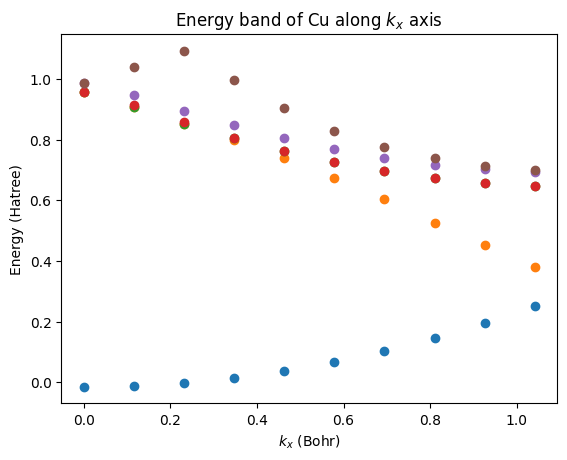

In [10]:
#Graphs 
kx = list(map(lambda k: k[0],ks2))

for i in range(6):
    plt.scatter(kx,Es2[:,i]/2)
plt.title(r"Energy band of Cu along $k_x$ axis")
plt.xlabel(r"$k_x$ (Bohr)")
plt.ylabel("Energy (Hatree)")
plt.show()